In [ ]:
import pandas as pd
data = pd.read_csv('/content/Tunjangan_DPR.csv')
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1960669880476168407,Wed Aug 27 11:45:01 +0000 2025,294,Kontradiksi APBN: Anggaran DPR Naik Dana Daera...,1960669880476168407,NaN,NaN,in,NaN,3,15,186,https://x.com/undefined/status/196066988047616...,18129942,NaN
1,1960554577956364378,Wed Aug 27 04:06:51 +0000 2025,1621,Selamat pagi para beban negara! Sudahkah kalia...,1960554577956364378,NaN,NaN,in,NaN,10,39,636,https://x.com/undefined/status/196055457795636...,170542374,NaN
2,1961590015747821938,Sat Aug 30 00:41:18 +0000 2025,970,Eh kita kaya bgt ya bisa kasih tunjangan ke ka...,1961590015747821938,https://pbs.twimg.com/media/Gzj3uThbIAAkQvb.jpg,NaN,in,NaN,11,41,237,https://x.com/undefined/status/196159001574782...,1133265314790092801,NaN
3,1962022893761839104,Sun Aug 31 05:21:25 +0000 2025,850,Tunjangan Pemicu Demonstrasi Berbagai fasilita...,1962022893761839104,https://pbs.twimg.com/media/GzqBaJAaYAAef70.jpg,NaN,in,NaN,9,19,417,https://x.com/undefined/status/196202289376183...,18129942,NaN
4,1962075551067426885,Sun Aug 31 08:50:39 +0000 2025,468,Presiden Prabowo Subianto mengungkapkan Dewan ...,1962075551067426885,https://pbs.twimg.com/media/GzqxTwIaMAAHh2q.jpg,NaN,in,NaN,49,102,97,https://x.com/undefined/status/196207555106742...,23343960,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      161 non-null    int64  
 1   created_at               161 non-null    object 
 2   favorite_count           161 non-null    int64  
 3   full_text                161 non-null    object 
 4   id_str                   161 non-null    int64  
 5   image_url                39 non-null     object 
 6   in_reply_to_screen_name  44 non-null     object 
 7   lang                     161 non-null    object 
 8   location                 0 non-null      float64
 9   quote_count              161 non-null    int64  
 10  reply_count              161 non-null    int64  
 11  retweet_count            161 non-null    int64  
 12  tweet_url                161 non-null    object 
 13  user_id_str              161 non-null    int64  
 14  username                 0

#Cleaning Data

In [ ]:
data["full_text"]

,full_text
0,Kontradiksi APBN: Anggaran DPR Naik Dana Daera...
1,Selamat pagi para beban negara! Sudahkah kalia...
2,Eh kita kaya bgt ya bisa kasih tunjangan ke ka...
3,Tunjangan Pemicu Demonstrasi Berbagai fasilita...
4,Presiden Prabowo Subianto mengungkapkan Dewan ...
...,...
156,@njenjelll Hai Kak. Silakan pastikan terlebih ...
157,@tanyabiartahu @abellamendoza17 Paket stimulus...
158,DAFTAR 17 Paket Bantuan Terbaru Resmi Dikucurk...
159,Sementara itu Sekjen DPR Indra Iskandar sebelu...


In [ ]:
#Cleaning Function
import re
def clean(s):
    s = s.lower()
    s = s.replace(r'<lb>', "\n")
    s = s.replace(r'<tab>', "\i")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = s.replace("&amp;", "&")
    # markdown urls
    s = re.sub(r'\(https*://[^\)]*\)', "", s)
    # normal urls
    s = re.sub(r'https*://[^\s]*', "", s)
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    s = re.sub(r'!', ' ', s)
    s = re.sub(r'@', ' ', s)
    s = re.sub(r':', ' ', s)
    s = re.sub(r'#\w+', '', s)
    s = re.sub(r'[^a-zA-Z\s]', '', s)
    s = re.sub(r'film', '', s)
    s = re.sub(r'animasi', '', s)
    s = re.sub(r'jumbo', '', s)
    s = re.sub(r'yg', '', s)
    s = re.sub(r'si', '', s)
    s = re.sub(r'ga', '', s)
    return str(s)

#Membuat sebuah variabel baru untuk menyimpan data hasil cleaning
data["text_clean"] = ''

#Pembersihan text dari symbol
for i, row in data.iterrows():
    data.at[i, "text_clean"] = clean(row.full_text)

data.head()

<>:6: SyntaxWarning: invalid escape sequence '\i'
<>:6: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipython-input-965867937.py:6: SyntaxWarning: invalid escape sequence '\i'
  s = s.replace(r'<tab>', "\i")


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,text_clean
0,1960669880476168407,Wed Aug 27 11:45:01 +0000 2025,294,Kontradiksi APBN: Anggaran DPR Naik Dana Daera...,1960669880476168407,NaN,NaN,in,NaN,3,15,186,https://x.com/undefined/status/196066988047616...,18129942,NaN,kontradik apbn angran dpr naik dana daerah tu...
1,1960554577956364378,Wed Aug 27 04:06:51 +0000 2025,1621,Selamat pagi para beban negara! Sudahkah kalia...,1960554577956364378,NaN,NaN,in,NaN,10,39,636,https://x.com/undefined/status/196055457795636...,170542374,NaN,selamat pagi para beban nera sudahkah kalian ...
2,1961590015747821938,Sat Aug 30 00:41:18 +0000 2025,970,Eh kita kaya bgt ya bisa kasih tunjangan ke ka...,1961590015747821938,https://pbs.twimg.com/media/Gzj3uThbIAAkQvb.jpg,NaN,in,NaN,11,41,237,https://x.com/undefined/status/196159001574782...,1133265314790092801,NaN,eh kita kaya bgt ya bisa kah tunjann ke karyaw...
3,1962022893761839104,Sun Aug 31 05:21:25 +0000 2025,850,Tunjangan Pemicu Demonstrasi Berbagai fasilita...,1962022893761839104,https://pbs.twimg.com/media/GzqBaJAaYAAef70.jpg,NaN,in,NaN,9,19,417,https://x.com/undefined/status/196202289376183...,18129942,NaN,tunjann pemicu demonstra berbai falitas yang d...
4,1962075551067426885,Sun Aug 31 08:50:39 +0000 2025,468,Presiden Prabowo Subianto mengungkapkan Dewan ...,1962075551067426885,https://pbs.twimg.com/media/GzqxTwIaMAAHh2q.jpg,NaN,in,NaN,49,102,97,https://x.com/undefined/status/196207555106742...,23343960,NaN,preden prabowo subianto mengungkapkan dewan pe...


#Proses NLTK

In [ ]:
pip install nltk

In [ ]:
#Tokenisasi
import nltk

nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize,word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
#Contoh tokenisasi

example_text = "Hello there, how are you doing today? The weather is great today. The sky is blue. python is awsome"
print(sent_tokenize(example_text))
print(word_tokenize(example_text))

['Hello there, how are you doing today?', 'The weather is great today.', 'The sky is blue.', 'python is awsome']
['Hello', 'there', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', 'today', '.', 'The', 'sky', 'is', 'blue', '.', 'python', 'is', 'awsome']


In [ ]:
# Tokenisasi kata pada kolom 'text_clean'
data['tokenized_text'] = data['text_clean'].apply(lambda x: word_tokenize(x))

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text
data[['text_clean', 'tokenized_text']].head()

,text_clean,tokenized_text
0,kontradik apbn angran dpr naik dana daerah tu...,"[kontradik, apbn, angran, dpr, naik, dana, dae..."
1,selamat pagi para beban nera sudahkah kalian ...,"[selamat, pagi, para, beban, nera, sudahkah, k..."
2,eh kita kaya bgt ya bisa kah tunjann ke karyaw...,"[eh, kita, kaya, bgt, ya, bisa, kah, tunjann, ..."
3,tunjann pemicu demonstra berbai falitas yang d...,"[tunjann, pemicu, demonstra, berbai, falitas, ..."
4,preden prabowo subianto mengungkapkan dewan pe...,"[preden, prabowo, subianto, mengungkapkan, dew..."


In [ ]:
import nltk
nltk.download('stopwords')

# Mendapatkan daftar stopwords dalam bahasa Indonesia

from nltk.corpus import stopwords
stop_words_indonesia = stopwords.words('indonesian')

stop_words_indonesia

In [ ]:
#Contoh Stopword

from nltk.corpus import stopwords

text = 'he is a good boy. he is very good in coding'
text = word_tokenize(text)
text_with_no_stopwords = [word for word in text if word not in stopwords.words('english')]
text_with_no_stopwords

['good', 'boy', '.', 'good', 'coding']

In [ ]:
# Mendapatkan daftar stopwords dalam bahasa Indonesia
stop_words_indonesia = stopwords.words('indonesian')

# Fungsi untuk menghapus stopwords dari list token
def remove_stopwords(token_list):
  return [word for word in token_list if word.lower() not in stop_words_indonesia]

# Menerapkan fungsi remove_stopwords ke kolom 'tokenized_text'
data['tokenized_stopwords'] = data['tokenized_text'].apply(remove_stopwords)

# Menampilkan beberapa baris pertama data dengan kolom tokenized_text_no_stopwords
data[['tokenized_text', 'tokenized_stopwords']].head()


,tokenized_text,tokenized_stopwords
0,"[kontradik, apbn, angran, dpr, naik, dana, dae...","[kontradik, apbn, angran, dpr, dana, daerah, t..."
1,"[selamat, pagi, para, beban, nera, sudahkah, k...","[selamat, pagi, beban, nera, keras, jann, lupa..."
2,"[eh, kita, kaya, bgt, ya, bisa, kah, tunjann, ...","[eh, kaya, bgt, ya, kah, tunjann, karyawan, ak..."
3,"[tunjann, pemicu, demonstra, berbai, falitas, ...","[tunjann, pemicu, demonstra, berbai, falitas, ..."
4,"[preden, prabowo, subianto, mengungkapkan, dew...","[preden, prabowo, subianto, dewan, perwakilan,..."


#Stemming

In [ ]:
#Contoh Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()    ## Creating an object for porterstemmer
example_words = ['earn',"earning","earned","earns"]  ##Example words
for w in example_words:
    print(ps.stem(w))

earn
earn
earn
earn


In [ ]:
pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.2 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat objek stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming pada list token
def stemming_sastrawi(token_list):
  return [stemmer.stem(word) for word in token_list]

# Terapkan fungsi stemming_sastrawi ke kolom 'tokenized_stopwords'
data['stemmed_words'] = data['tokenized_stopwords'].apply(stemming_sastrawi)

# Menampilkan beberapa baris pertama data dengan kolom stemmed_words
data[['tokenized_stopwords', 'stemmed_words']]

,tokenized_stopwords,stemmed_words
0,"[kontradik, apbn, angran, dpr, dana, daerah, t...","[kontradik, apbn, angran, dpr, dana, daerah, t..."
1,"[selamat, pagi, beban, nera, keras, jann, lupa...","[selamat, pagi, beban, nera, keras, jann, lupa..."
2,"[eh, kaya, bgt, ya, kah, tunjann, karyawan, ak...","[eh, kaya, bgt, ya, kah, tunjann, karyawan, ak..."
3,"[tunjann, pemicu, demonstra, berbai, falitas, ...","[tunjann, picu, demonstra, berbai, falitas, te..."
4,"[preden, prabowo, subianto, dewan, perwakilan,...","[preden, prabowo, subianto, dewan, wakil, raky..."
...,...,...
156,"[njenjelll, hai, kak, lakan, pastikan, terutan...","[njenjelll, hai, kak, lak, pasti, utang, trans..."
157,"[tanyabiartahu, abellamendoza, paket, stimulus...","[tanyabiartahu, abellamendoza, paket, stimulus..."
158,"[daftar, paket, bantuan, terbaru, resmi, dikuc...","[daftar, paket, bantu, baru, resmi, kucur, sep..."
159,"[sekjen, dpr, indra, iskandar, menyebut, tunja...","[sekjen, dpr, indra, iskandar, sebut, tunjann,..."


#Analisis Sentimen

In [ ]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.8 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Inisialisasi objek SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text_list):
    # Gabungkan list token menjadi satu string
    text = " ".join(text_list)

    # Lakukan analisis sentimen
    scores = analyzer.polarity_scores(text)

    # Kembalikan nilai compound score
    return scores['compound']

# Terapkan fungsi analyze_sentiment ke kolom 'stemmed_words'
data['sentiment_score'] = data['stemmed_words'].apply(analyze_sentiment)

In [ ]:
data[['stemmed_words', 'sentiment_score']]

,stemmed_words,sentiment_score
0,"[kontradik, apbn, angran, dpr, dana, daerah, t...",0.0000
1,"[selamat, pagi, beban, nera, keras, jann, lupa...",0.0000
2,"[eh, kaya, bgt, ya, kah, tunjann, karyawan, ak...",0.2263
3,"[tunjann, picu, demonstra, berbai, falitas, te...",0.0000
4,"[preden, prabowo, subianto, dewan, wakil, raky...",0.0000
...,...,...
156,"[njenjelll, hai, kak, lak, pasti, utang, trans...",0.0000
157,"[tanyabiartahu, abellamendoza, paket, stimulus...",0.3182
158,"[daftar, paket, bantu, baru, resmi, kucur, sep...",0.0000
159,"[sekjen, dpr, indra, iskandar, sebut, tunjann,...",0.4404


In [ ]:
# Fungsi untuk menentukan label sentimen berdasarkan sentiment_score
def label_sentiment(score):
    if score < 0:
        return 'negatif'
    elif score == 0:
        return 'netral'
    else:
        return 'positif'

# Buat kolom baru 'sentiment_label' berdasarkan kolom 'sentiment_score'
data['sentiment_label'] = data['sentiment_score'].apply(label_sentiment)

# Menampilkan beberapa baris pertama data dengan kolom sentiment_label
data[['stemmed_words', 'sentiment_score', 'sentiment_label']].head()

,stemmed_words,sentiment_score,sentiment_label
0,"[kontradik, apbn, angran, dpr, dana, daerah, t...",0.0000,netral
1,"[selamat, pagi, beban, nera, keras, jann, lupa...",0.0000,netral
2,"[eh, kaya, bgt, ya, kah, tunjann, karyawan, ak...",0.2263,positif
3,"[tunjann, picu, demonstra, berbai, falitas, te...",0.0000,netral
4,"[preden, prabowo, subianto, dewan, wakil, raky...",0.0000,netral


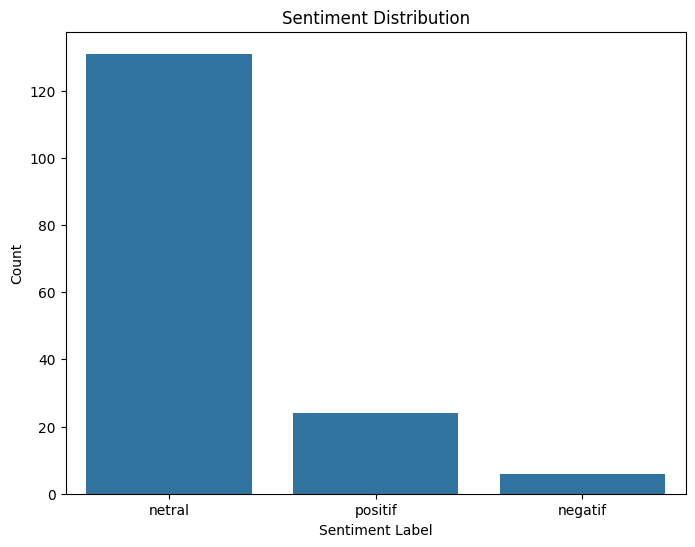

In [ ]:
#Membuat grafik plot
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

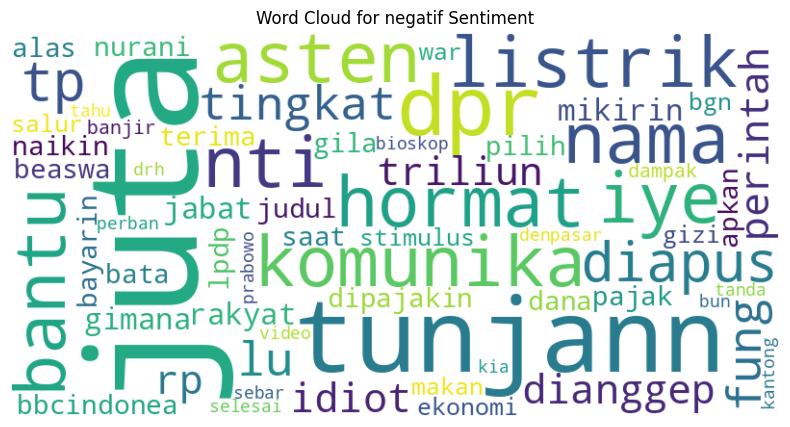

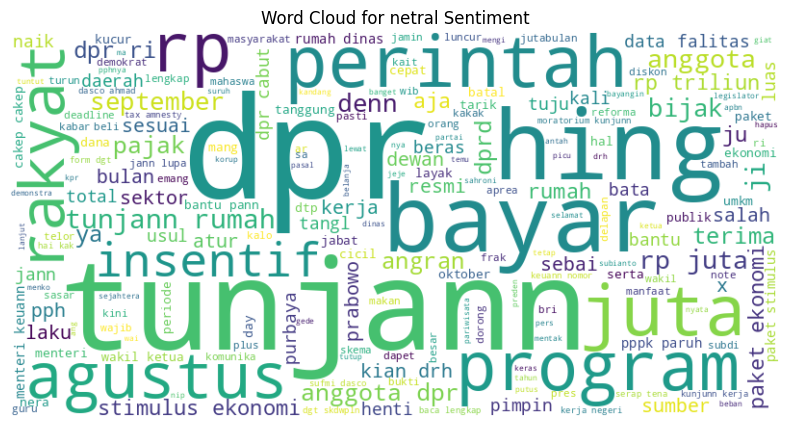

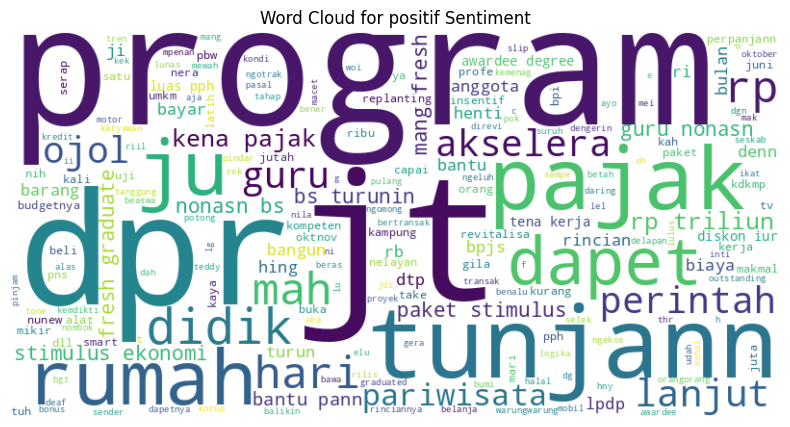

In [ ]:
# Group data by sentiment label
sentiment_groups = data.groupby('sentiment_label')

# Create word clouds for each sentiment category
for sentiment, group in sentiment_groups:
    # Combine all stemmed words in the group
    all_words = ' '.join([' '.join(words) for words in group['stemmed_words']])

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

    # Display the generated image:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.show()